In [1]:
##载入模块
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline   
#将图片在页面中展示

In [2]:
#载入数据
data=pd.read_csv('D:python/data/nba_2017_nba_players_with_salary.csv')
data.head(5)

,Unnamed: 0,Rk,PLAYER,POSITION,AGE,MP,FG,FGA,FG%,3P,...,GP,MPG,ORPM,DRPM,RPM,WINS_RPM,PIE,PACE,W,SALARY_MILLIONS
0,0,1,Russell Westbrook,PG,28,34.6,10.2,24.0,0.425,2.5,...,81,34.6,6.74,-0.47,6.27,17.34,23.0,102.31,46,26.50
1,1,2,James Harden,PG,27,36.4,8.3,18.9,0.440,3.2,...,81,36.4,6.38,-1.57,4.81,15.54,19.0,102.98,54,26.50
2,2,3,Isaiah Thomas,PG,27,33.8,9.0,19.4,0.463,3.2,...,76,33.8,5.72,-3.89,1.83,8.19,16.1,99.84,51,6.59
3,3,4,Anthony Davis,C,23,36.1,10.3,20.3,0.505,0.5,...,75,36.1,0.45,3.90,4.35,12.81,19.2,100.19,31,22.12
4,4,6,DeMarcus Cousins,C,26,34.2,9.0,19.9,0.452,1.8,...,72,34.2,3.56,0.64,4.20,11.26,17.8,97.11,30,16.96


## 构建目标变量

In [3]:
data['target']=data['SALARY_MILLIONS'].apply(lambda x:1 if x>15 else 0)

In [4]:
a=data['target']
a.value_counts()

0    291
1     51
Name: target, dtype: int64

In [5]:
data.columns

Index(['Unnamed: 0', 'Rk', 'PLAYER', 'POSITION', 'AGE', 'MP', 'FG', 'FGA',
       'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA',
       'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'POINTS',
       'TEAM', 'GP', 'MPG', 'ORPM', 'DRPM', 'RPM', 'WINS_RPM', 'PIE', 'PACE',
       'W', 'SALARY_MILLIONS', 'target'],
      dtype='object')

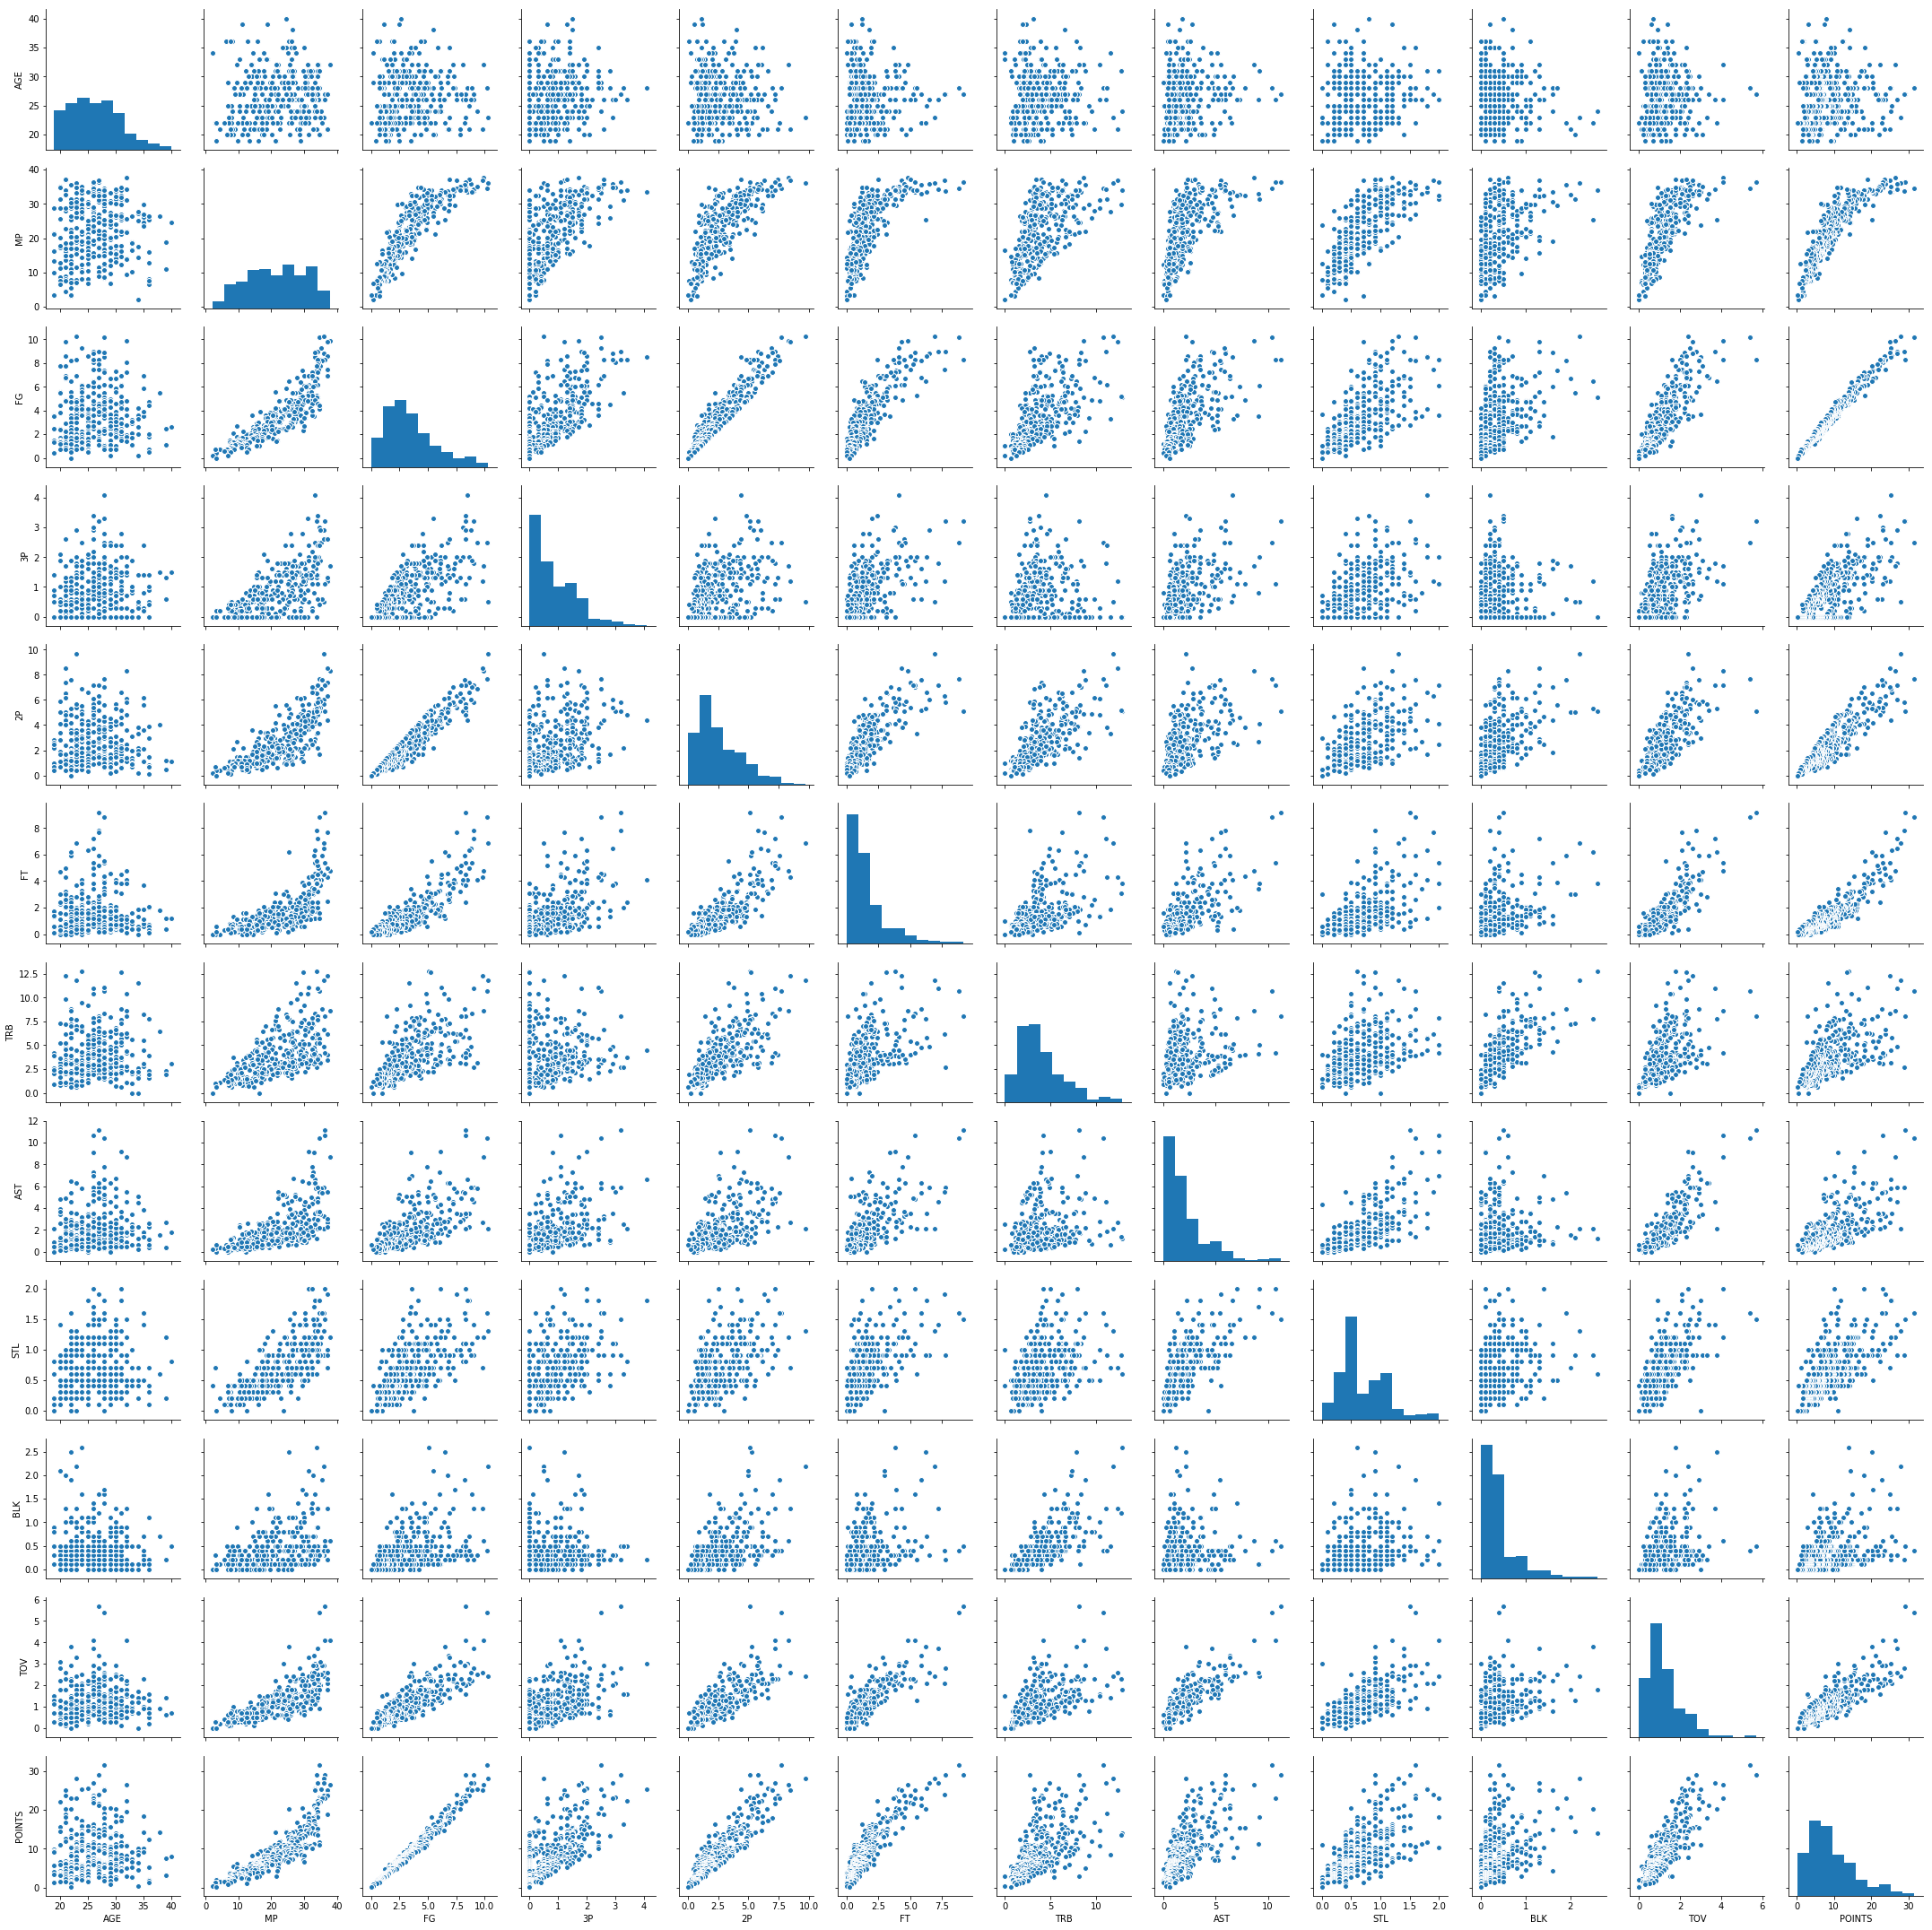

In [6]:
dat=data.loc[:,['AGE','MP','FG','3P','2P','FT','TRB','AST','STL','BLK','TOV','POINTS','POSITION']]
sns.pairplot(dat)

## KNN算法

In [7]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cross_validation import cross_val_score

F:\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [8]:
x=data.loc[:,['AGE','MP','FG','3P','2P','FT','TRB','AST','STL','BLK','TOV','POINTS']]
y=data['target']

knn=KNeighborsClassifier(n_neighbors=5)  ##构造KNN分类器

score = cross_val_score(knn, x, y, cv = 5, scoring = 'accuracy')
print(score)

[0.47142857 0.89705882 0.88235294 0.85294118 0.85294118]


## 遍历k参数看效果

In [9]:
k_range=np.arange(1,31)   #定义KNN算法中的K值

k_score=[]
for k in k_range:
    knn=KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, x, y, cv = 10, scoring = 'accuracy')
    k_score.append(scores.mean())

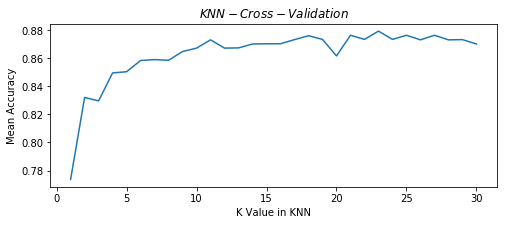

In [10]:
plt.figure(figsize=(8,3))
plt.plot(k_range, k_score)
plt.xlabel('K Value in KNN')
plt.ylabel('Mean Accuracy')
plt.title('$KNN-Cross-Validation$')
plt.show()

##  交叉验证

In [11]:
from sklearn import model_selection
from sklearn import metrics

#将数据集分成训练集和测试集
X_train,X_test,Y_train,Y_test=model_selection.train_test_split(x,y,test_size=0.3,random_state=123)
print('shape_X_train:',X_train.shape)
print('shape_Y_train:',Y_train.shape)
print('shape_X_test:',X_test.shape)
print('shape_Y_test:',Y_test.shape)

shape_X_train: (239, 12)
shape_Y_train: (239,)
shape_X_test: (103, 12)
shape_Y_test: (103,)


In [12]:
#构造模型并训练
knn=KNeighborsClassifier(n_neighbors=10)
knn_c=knn.fit(X_train,Y_train)

#用模型对数据集做预测
pre_train=knn_c.predict(X_train)
pre_test=knn_c.predict(X_test)


#生成评价报告
print('\n训练集评级:')
print('-------------------------------------------------------------------------------------------------')
print('混淆矩阵:\n',metrics.confusion_matrix(pre_train,Y_train))
print('\n精确度:\n',metrics.accuracy_score(pre_train,Y_train))
print('\n评估报告:\n',metrics.classification_report(pre_train,Y_train))
print('-------------------------------------------------------------------------------------------------')

print('\n\n\n测试集评级:')
print('-------------------------------------------------------------------------------------------------')
print('混淆矩阵:\n',metrics.confusion_matrix(pre_test,Y_test))
print('\n精确度:\n',metrics.accuracy_score(pre_test,Y_test))
print('\n评估报告:\n',metrics.classification_report(pre_test,Y_test))
print('-------------------------------------------------------------------------------------------------')


训练集评级:
-------------------------------------------------------------------------------------------------
混淆矩阵:
 [[204  18]
 [  5  12]]

精确度:
 0.9037656903765691

评估报告:
              precision    recall  f1-score   support

          0       0.98      0.92      0.95       222
          1       0.40      0.71      0.51        17

avg / total       0.94      0.90      0.92       239

-------------------------------------------------------------------------------------------------



测试集评级:
-------------------------------------------------------------------------------------------------
混淆矩阵:
 [[80 13]
 [ 2  8]]

精确度:
 0.8543689320388349

评估报告:
              precision    recall  f1-score   support

          0       0.98      0.86      0.91        93
          1       0.38      0.80      0.52        10

avg / total       0.92      0.85      0.88       103

-------------------------------------------------------------------------------------------------
